<AxesSubplot:>

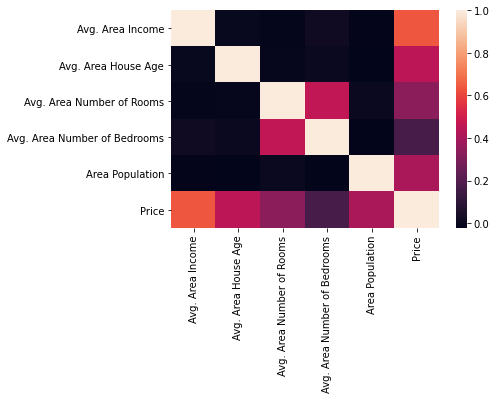

In [9]:
import pandas 
import seaborn
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

USAhousing = pandas.read_csv('USA_Housing.csv')

seaborn.heatmap(USAhousing.corr())


In [10]:
X = USAhousing[[
        'Avg. Area Income', 
        'Avg. Area House Age', 
        'Avg. Area Number of Rooms',
        'Avg. Area Number of Bedrooms', 
        'Area Population'
    ]]

y = USAhousing['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4974,70720.296463,6.411801,5.048128,3.01,19114.019253
3865,77910.269900,4.638075,6.304586,4.35,28126.825639
2044,65220.998168,6.037269,8.860937,4.49,19500.484535
3732,78511.797210,5.252930,6.597951,4.04,38180.372532
2068,61150.557221,8.366245,6.724712,3.15,31517.118212
...,...,...,...,...,...
3483,97881.587279,5.034395,7.575905,5.46,37152.799341
32,55041.351583,7.127129,8.591923,5.36,30122.473484
4524,95358.180551,5.140235,6.611756,2.02,49759.127811
1653,67094.197072,5.346437,7.374607,4.18,30022.537173


In [11]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

coefs = pandas.DataFrame(linear_regression.coef_, X.columns, columns=['Coefs'])

coefs

,Coefs
Avg. Area Income,21.538914
Avg. Area House Age,164780.385158
Avg. Area Number of Rooms,119006.741481
Avg. Area Number of Bedrooms,2628.700153
Area Population,15.330053


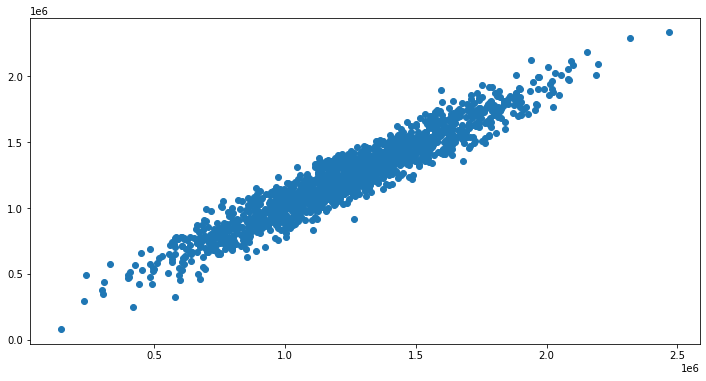

In [12]:
predict = linear_regression.predict(X_test)
pyplot.figure(figsize=(12, 6))
pyplot.scatter(y_test, predict)

In [18]:
from sklearn import metrics
from numpy import sqrt

seaborn.distplot((y_test-predict))

print(f'[MEA] {metrics.mean_absolute_error(y_test, predict)}')
print(f'[MSE] {metrics.mean_squared_error(y_test, predict)}')
print(f'[RMSE] {sqrt(metrics.mean_squared_error(y_test, predict))}')

[MEA] 82225.53676219824
[MSE] 10431513747.937777
[RMSE] 102134.78226313392
